<a href="https://colab.research.google.com/github/ShamimaMoni/Linear-Regression/blob/master/Linear_Regression_Using_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print(boston.data.shape)

(506, 13)


In [5]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
import pandas as pd
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [34]:
y = pd.DataFrame(boston.target)
y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Text(0, 0.5, 'House Price')

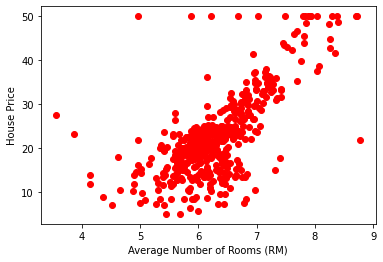

In [14]:
import matplotlib.pyplot as plt
plt.scatter(data['RM'],y, color = 'r')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('House Price')

In [36]:
import torch

X,y = torch.tensor(data['RM']).reshape(-1,1), torch.tensor(y.values).reshape(-1,1)

In [41]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

train_X, test_X = train_X.type(torch.float), test_X.type(torch.float)
train_y, test_y = train_y.type(torch.float), test_y.type(torch.float)

In [28]:
import torch.nn as nn

class Model (nn.Module):

  def __init__(self, in_features, out_features):

    super().__init__()
    self.linear = nn.Linear(in_features, out_features)

  def forward(self,X):
    y_pred = self.linear(X)
    return y_pred

In [43]:
input_dim = 1
output_dim = 1
epochs = 100
losses = []

model = Model(input_dim, output_dim) 

criterion = nn.MSELoss()
optimizer = torch.optim.SGD (model.parameters(), lr = 0.001)

In [44]:
for i in range(epochs):

  i += 1
  y_pred = model.forward(train_X)
  loss = criterion(y_pred, train_y)

  losses.append(loss)
  print(f"epoch {i} loss: {loss.item()}")

  optimizer.zero_grad()

  loss.backward()
  optimizer.step()

epoch 1 loss: 465.10321044921875
epoch 2 loss: 400.8846740722656
epoch 3 loss: 346.8934020996094
epoch 4 loss: 301.5006408691406
epoch 5 loss: 263.33697509765625
epoch 6 loss: 231.2510528564453
epoch 7 loss: 204.27505493164062
epoch 8 loss: 181.59507751464844
epoch 9 loss: 162.52699279785156
epoch 10 loss: 146.49557495117188
epoch 11 loss: 133.01715087890625
epoch 12 loss: 121.68513488769531
epoch 13 loss: 112.15774536132812
epoch 14 loss: 104.14759826660156
epoch 15 loss: 97.41297912597656
epoch 16 loss: 91.75078582763672
epoch 17 loss: 86.99024200439453
epoch 18 loss: 82.98770904541016
epoch 19 loss: 79.62251281738281
epoch 20 loss: 76.79310607910156
epoch 21 loss: 74.4141845703125
epoch 22 loss: 72.41400909423828
epoch 23 loss: 70.73224639892578
epoch 24 loss: 69.31819152832031
epoch 25 loss: 68.12921905517578
epoch 26 loss: 67.12946319580078
epoch 27 loss: 66.288818359375
epoch 28 loss: 65.58192443847656
epoch 29 loss: 64.98747253417969
epoch 30 loss: 64.4875717163086
epoch 31 loss

Text(0.5, 0, 'Epoch')

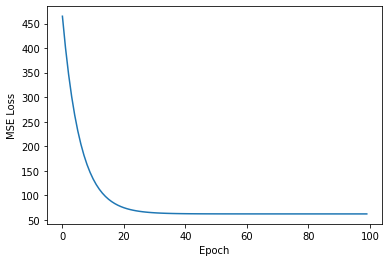

In [45]:
plt.plot(range(epochs), losses)
plt.ylabel("MSE Loss")
plt.xlabel("Epoch")

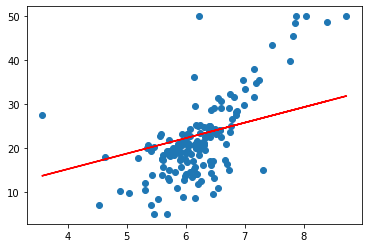

In [46]:
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()
predicted_y = current_weight*test_X + current_bias

plt.scatter(test_X.numpy(),test_y.numpy())
plt.plot(test_X, predicted_y, color='r')